<a href="https://colab.research.google.com/github/li0ne/q-macro/blob/main/HPfileterione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

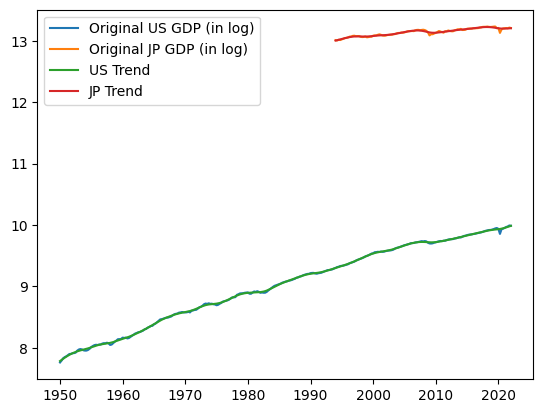

In [8]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np

# set the start and end dates for the data
start_date = '1950-01-01'
end_date = '2022-01-01'

# download the data from FRED using pandas_datareader
gdp_us = web.DataReader('GDPC1', 'fred', start_date, end_date)
gdp_jp = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)
log_gdp_us = np.log(gdp_us)
log_gdp_jp = np.log(gdp_jp)

# calculate the quarterly percent change in real GDP
gdp_us_pct_change = gdp_us.pct_change(4)
gdp_jp_pct_change = gdp_jp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle_us, trend_us = sm.tsa.filters.hpfilter(log_gdp_us, lamb=100)
cycle_jp, trend_jp = sm.tsa.filters.hpfilter(log_gdp_jp, lamb=100)

# Plot the original time series data
plt.plot(log_gdp_us, label="Original US GDP (in log)")
plt.plot(log_gdp_jp, label="Original JP GDP (in log)")

# Plot the trend component
plt.plot(trend_us, label="US Trend")
plt.plot(trend_jp, label="JP Trend")

# Add a legend and show the plot
plt.legend()
plt.show()
